In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [68]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')
quality.automf(3)
service.automf(3)
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

In [69]:
# quality['average'].view()

In [70]:
# service.view()

In [71]:
# tip.view()

In [48]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

In [49]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [50]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [67]:
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()


In [64]:
tipping.output['tip']

19.847607361963192

/home/narayanan/.local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


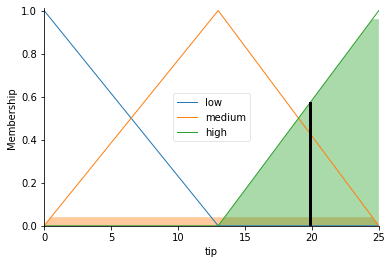

In [65]:
tip.view(sim=tipping)